<a href="https://colab.research.google.com/github/PreethiPara/Dry-Bean-Classification-/blob/main/Dry_bean_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_excel('Dry_Bean_Dataset.xlsx')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [ ]:
df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [ ]:
df.Class.nunique()

7

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


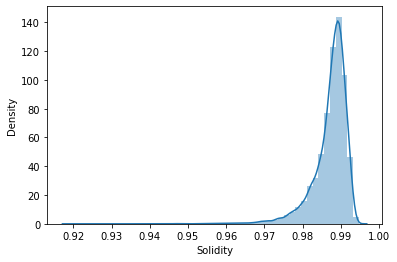

In [ ]:
sns.distplot(df.Solidity)

In [ ]:
df.Class.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

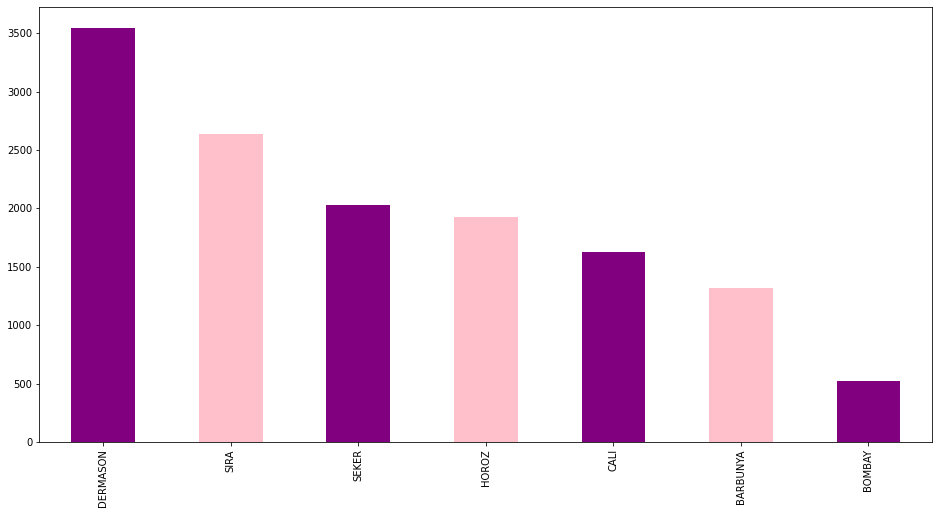

In [ ]:
df.Class.value_counts().plot.bar(figsize=(16,8),color=['purple','pink'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f753f875690>,
      dtype=object)

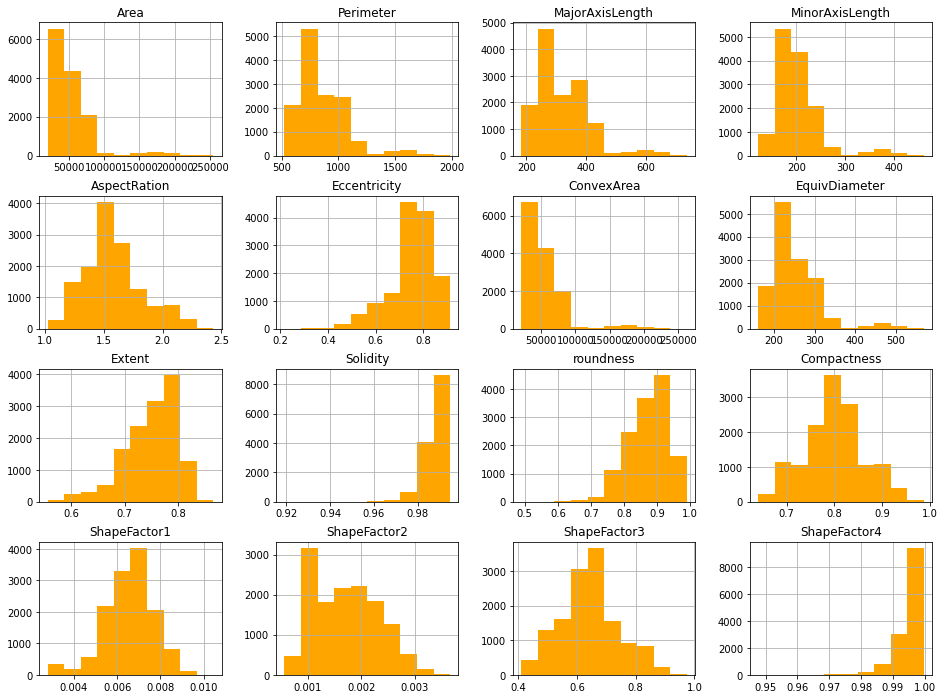

In [ ]:
df.hist(bins=10,figsize=(16,12),color='orange')

In [ ]:
df.shape

(13611, 17)

In [ ]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [ ]:
df.info

<bound method DataFrame.info of         Area  Perimeter  MajorAxisLength  ...  ShapeFactor3  ShapeFactor4     Class
0      28395    610.291       208.178117  ...      0.834222      0.998724     SEKER
1      28734    638.018       200.524796  ...      0.909851      0.998430     SEKER
2      29380    624.110       212.826130  ...      0.825871      0.999066     SEKER
3      30008    645.884       210.557999  ...      0.861794      0.994199     SEKER
4      30140    620.134       201.847882  ...      0.941900      0.999166     SEKER
...      ...        ...              ...  ...           ...           ...       ...
13606  42097    759.696       288.721612  ...      0.642988      0.998385  DERMASON
13607  42101    757.499       281.576392  ...      0.676099      0.998219  DERMASON
13608  42139    759.321       281.539928  ...      0.676884      0.996767  DERMASON
13609  42147    763.779       283.382636  ...      0.668237      0.995222  DERMASON
13610  42159    772.237       295.142741  ..

In [ ]:
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [ ]:
#map1={'SEKER':1,'BARBUNYA':2,'BOMBAY':3,'CALI':4,'HOROZ':5,'SIRA':6,'DERMASON':7}
#df.Class=df.Class.map(map1)
#df.head()

In [ ]:
temp=pd.get_dummies(df.Class)
temp.head()

,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0


In [ ]:
df.drop('Class',axis=1,inplace=True)
df=pd.concat([df,temp],axis=1)
df

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,BARBUNYA,BOMBAY,CALI,DERMASON,HOROZ,SEKER,SIRA
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,0,0,0,0,0,1,0
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,0,0,0,0,0,1,0
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,0,0,0,0,0,1,0
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,0,0,0,0,0,1,0
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,0,0,0,1,0,0,0
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,0,0,0,1,0,0,0
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,0,0,0,1,0,0,0
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,0,0,0,1,0,0,0


In [ ]:
x = df.iloc[:,:-7]
print(x)
y=df.iloc[:,-7:]
print(y)


        Area  Perimeter  ...  ShapeFactor3  ShapeFactor4
0      28395    610.291  ...      0.834222      0.998724
1      28734    638.018  ...      0.909851      0.998430
2      29380    624.110  ...      0.825871      0.999066
3      30008    645.884  ...      0.861794      0.994199
4      30140    620.134  ...      0.941900      0.999166
...      ...        ...  ...           ...           ...
13606  42097    759.696  ...      0.642988      0.998385
13607  42101    757.499  ...      0.676099      0.998219
13608  42139    759.321  ...      0.676884      0.996767
13609  42147    763.779  ...      0.668237      0.995222
13610  42159    772.237  ...      0.616221      0.998180

[13611 rows x 16 columns]
       BARBUNYA  BOMBAY  CALI  DERMASON  HOROZ  SEKER  SIRA
0             0       0     0         0      0      1     0
1             0       0     0         0      0      1     0
2             0       0     0         0      0      1     0
3             0       0     0         0      0   

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [ ]:
print(x_train)
print(x_test)

[[-0.40865341 -0.45097869 -0.37477393 ...  0.00468897 -0.1323717
  -0.16695899]
 [-0.85523907 -1.04683579 -0.90842577 ...  0.42253339 -0.36373034
   0.5793931 ]
 [-0.33488367 -0.33150817 -0.25105528 ... -0.15517109 -0.26472598
  -0.08222261]
 ...
 [ 0.07462902  0.34492751  0.67436922 ... -1.15992078 -1.52432151
  -0.13278127]
 [ 0.5027808   0.7696124   0.6135594  ... -0.6819623  -0.22731582
   0.4538221 ]
 [ 0.42819025  0.77186964  0.92372914 ... -1.14828645 -1.20824343
  -2.56384993]]
[[-2.10908095e-01 -9.68619783e-02  1.21499112e-01 ... -7.00439397e-01
  -9.81858853e-01 -1.02324219e-01]
 [-5.24591943e-01 -6.97546695e-01 -9.58039827e-01 ...  1.80023217e+00
   2.04449421e+00  6.93895713e-01]
 [-2.81155219e-01 -2.26389630e-01 -2.28006529e-01 ... -1.11523712e-01
  -1.23015466e-01 -3.62870608e-04]
 ...
 [-5.63203921e-01 -7.28680813e-01 -7.23802614e-01 ...  6.84182688e-01
   5.53506493e-01  8.14563321e-01]
 [ 9.31342976e-01  1.15970018e+00  1.29286881e+00 ... -1.19266368e+00
  -9.36773409e

In [ ]:
import tensorflow as tf

In [ ]:
ann=tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
ann.add(tf.keras.layers.Dense(units=7,activation='softmax'))
ann.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
print(x_train.shape)
print(y_train.shape)

(10888, 16)
(10888, 7)


In [ ]:
ann.fit(x_train,y_train,batch_size=32,epochs=50)

Epoch 1/50
341/341 [==============================] - 1s 1ms/step - loss: 0.8175 - accuracy: 0.7224
Epoch 2/50
341/341 [==============================] - 0s 1ms/step - loss: 0.3185 - accuracy: 0.8951
Epoch 3/50
341/341 [==============================] - 0s 1ms/step - loss: 0.2463 - accuracy: 0.9141
Epoch 4/50
341/341 [==============================] - 0s 1ms/step - loss: 0.2248 - accuracy: 0.9208
Epoch 5/50
341/341 [==============================] - 0s 1ms/step - loss: 0.2149 - accuracy: 0.9229
Epoch 6/50
341/341 [==============================] - 0s 1ms/step - loss: 0.2105 - accuracy: 0.9240
Epoch 7/50
341/341 [==============================] - 0s 1ms/step - loss: 0.2068 - accuracy: 0.9245
Epoch 8/50
341/341 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9234
Epoch 9/50
341/341 [==============================] - 0s 1ms/step - loss: 0.1998 - accuracy: 0.9262
Epoch 10/50
341/341 [==============================] - 0s 1ms/step - loss: 0.1996 - accuracy: 0.9262

In [ ]:
results=ann.evaluate(x_test,y_test)
print(f'accu of model:',results[1]*100)

86/86 [==============================] - 0s 1ms/step - loss: 0.1891 - accuracy: 0.9280
accu of model: 92.80205368995667


In [ ]:
y_pred=ann.predict(x_test)
y_test_n=[]
for i in y_pred:
  if i[6].round()==1:
    y_test_n.append(7)
  elif i[5].round()==1:
    y_test_n.append(6)
  elif i[4].round()==1:
    y_test_n.append(5)
  elif i[3].round()==1:
    y_test_n.append(4)
  elif i[2].round()==1:
    y_test_n.append(3)
  elif i[1].round()==1:
    y_test_n.append(2)
  elif i[0].round()==1:
    y_test_n.append(1)
  else:
    y_test_n.append(0)
y_test_n=np.asarray(y_test_n).reshape(1,-1).reshape(len(y_test_n),1)
print(y_test_n)









[[7]
 [6]
 [7]
 ...
 [4]
 [3]
 [4]]


In [ ]:
y_test=np.asarray(y_test).reshape(-1,7)
y_test


array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [ ]:
y_test_f=[]
for i in y_test:
  if i[6].round()==1:
    y_test_f.append(7)
  elif i[5].round()==1:
    y_test_f.append(6)
  elif i[4].round()==1:
    y_test_f.append(5)
  elif i[3].round()==1:
    y_test_f.append(4)
  elif i[2].round()==1:
    y_test_f.append(3)
  elif i[1].round()==1:
    y_test_f.append(2)
  elif i[0].round()==1:
    y_test_f.append(1)
  else:
    y_test_f.append(0)
y_test_f
y_test_f=np.asarray(y_test_f).reshape(1,-1).reshape(len(y_test_f),1)
print(y_test_f)

[[5]
 [6]
 [7]
 ...
 [4]
 [3]
 [4]]


In [ ]:
print(y_test_f.shape)
print(y_test_n.shape)

(2723, 1)
(2723, 1)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test_f,y_test_n)
print(accuracy)


0.9236136614028645


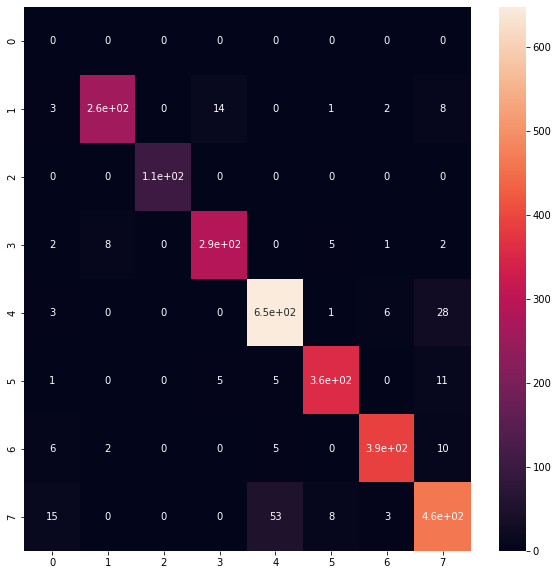

In [ ]:
from seaborn import matrix
from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_test_f,y_test_n)
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)